## Missing Values- House Price Data

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# import plotly.plotly as py

In [2]:
path= r"D:\My Computer\DATA\House Prices" #Windows
#path= r"/Users/nicapotato/Desktop/Data/House" #Mac

train_df = pd.read_csv(open(os.path.join(path, "train.csv"), "r"), index_col='Id')
test_df = pd.read_csv(open(os.path.join(path, "test.csv"), "r"), index_col='Id')

In [3]:
combine = [train_df, test_df]

In [4]:
combine[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
combine[0].describe(include=['O']).transpose().reset_index()

index count unique      top  freq
0        MSZoning  1460      5       RL  1151
1          Street  1460      2     Pave  1454
2           Alley    91      2     Grvl    50
3        LotShape  1460      4      Reg   925
4     LandContour  1460      4      Lvl  1311
5       Utilities  1460      2   AllPub  1459
6       LotConfig  1460      5   Inside  1052
7       LandSlope  1460      3      Gtl  1382
8    Neighborhood  1460     25    NAmes   225
9      Condition1  1460      9     Norm  1260
10     Condition2  1460      8     Norm  1445
11       BldgType  1460      5     1Fam  1220
12     HouseStyle  1460      8   1Story   726
13      RoofStyle  1460      6    Gable  1141
14       RoofMatl  1460      8  CompShg  1434
15    Exterior1st  1460     15  VinylSd   515
16    Exterior2nd  1460     16  VinylSd   504
17     MasVnrType  1452      4     None   864
18      ExterQual  1460      4       TA   906
19      ExterCond  1460      5       TA  1282
20     Foundation  1460      6    PConc   647
21       BsmtQual  1423      4       TA   649
22       BsmtCond  1423      4       TA  1311
23   BsmtExposure  1422      4       No   953
24   BsmtFinType1  1423      6      Unf   430
25   BsmtFinType2  1422      6      Unf  1256
26        Heating  1460      6     GasA  1428
27      HeatingQC  1460      5       Ex   741
28     CentralAir  1460      2        Y  1365
29     Electrical  1459      5    SBrkr  1334
30    KitchenQual  1460      4       TA   735
31     Functional  1460      7      Typ  1360
32    FireplaceQu   770      5       Gd   380
33     GarageType  1379      6   Attchd   870
34   GarageFinish  1379      3      Unf   605
35     GarageQual  1379      5       TA  1311
36     GarageCond  1379      5       TA  1326
37     PavedDrive  1460      3        Y  1340
38         PoolQC     7      3       Gd     3
39          Fence   281      4    MnPrv   157
40    MiscFeature    54      4     Shed    49
41       SaleType  1460      9       WD  1267
42  SaleCondition  1460      6   Normal  1198

In [6]:
train_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

In [7]:
pd.set_option('display.max_columns', None)
train_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                     
1          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
2          Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
3          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
4          Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
5          Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

   Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                       
1        Norm     1Fam     2Story            7            5       2003   
2        Norm     1Fam     1Story            6            8       1976   
3        Norm     1Fam     2Story            7            5       2001   
4        Norm     1Fam     2Story            7            5       1915   
5        Norm     1Fam     2Story            8            5       2000   

    YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                       
1           2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
2           1976     Gable  CompShg     MetalSd     MetalSd       None   
3           2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4           1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
5           2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

    MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
Id                                                                             
1        196.0        Gd        TA      PConc       Gd       TA           No   
2          0.0        TA        TA     CBlock       Gd       TA           Gd   
3        162.0        Gd        TA      PConc       Gd       TA           Mn   
4          0.0        TA        TA     BrkTil       TA       Gd           No   
5        350.0        Gd        TA      PConc       Gd       TA           Av   

   BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           GLQ         706          Unf           0        150          856   
2           ALQ         978          Unf           0        284         1262   
3           GLQ         486          Unf           0        434          920   
4           ALQ         216          Unf           0        540          756   
5           GLQ         655          Unf           0        490         1145   

   Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
Id                                                                             
1     GasA        Ex          Y      SBrkr       856       854             0   
2     GasA        Ex          Y      SBrkr      1262         0             0   
3     GasA        Ex          Y      SBrkr       920       866             0   
4     GasA        Gd          Y      SBrkr       961       756             0   
5     GasA        Ex          Y      SBrkr      1145      1053             0   

    GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                            
1        1710             1             0         2         1             3   
2        1262             0             1  

## Dependent Variable

Could use normalization

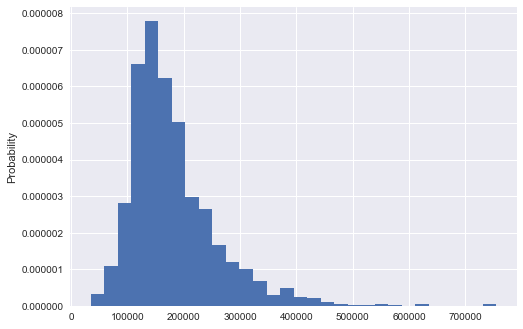

In [8]:
plt.hist(train_df.SalePrice, normed=True, bins=30)
plt.ylabel('Probability');

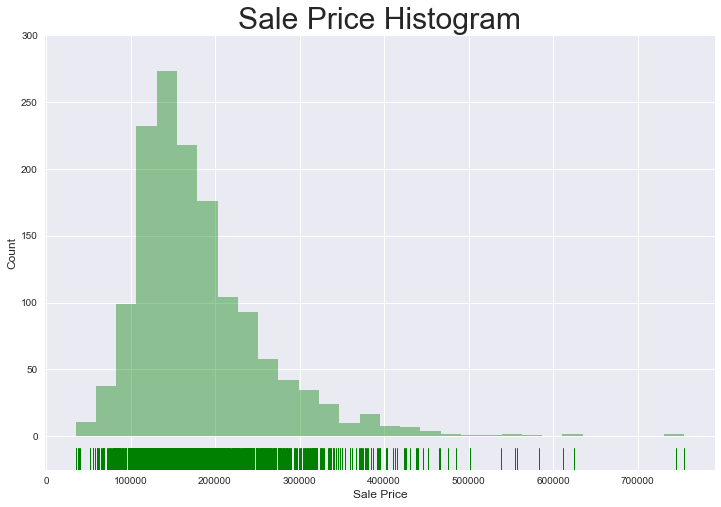

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.SalePrice, bins=30, kde=False, rug=True, color="g")
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title("Sale Price Histogram",fontsize=30)
plt.ylim(-25, 300)
plt.show()

## Missing Values

In [10]:
# Proportion Missing Table:
settypes= combine[0].dtypes.reset_index()
def test_train_mis(test, train):
    missing_test = test.isnull().sum(axis=0).reset_index()
    missing_test.columns = ['column_name', 'test_missing_count']
    missing_test['test_missing_ratio'] = missing_test['test_missing_count'] / test_df.shape[0]
    missing_train = train.isnull().sum(axis=0).reset_index()
    missing_train.columns = ['column_name', 'train_missing_count']
    missing_train['train_missing_ratio'] = missing_train['train_missing_count'] / train_df.shape[0]
    missing = pd.merge(missing_train, missing_test,
                       on='column_name', how='outer',indicator=True,
                      # suffixes=["_L", "_R"]
                       # left_on='name on left', right_on='name on right')
                      )
    missing = pd.merge(missing,settypes, left_on='column_name', right_on='index',how='inner')
    missing = missing.loc[(missing['train_missing_ratio']>0) | (missing['test_missing_ratio']>0)]\
    .sort_values(by=["train_missing_ratio"], ascending=False)
    missing['Diff'] = missing.train_missing_count - missing.test_missing_count
    print(missing)
    return missing

In [11]:
def missing_plot(train_df):
    missing_df = train_df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(12,18))
    rects = ax.barh(ind, missing_df.missing_count.values, color='red')
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    plt.show()

#### Visualize

In [12]:
pd.options.display.max_rows = 65
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64     34
1     float64      3
2      object     43

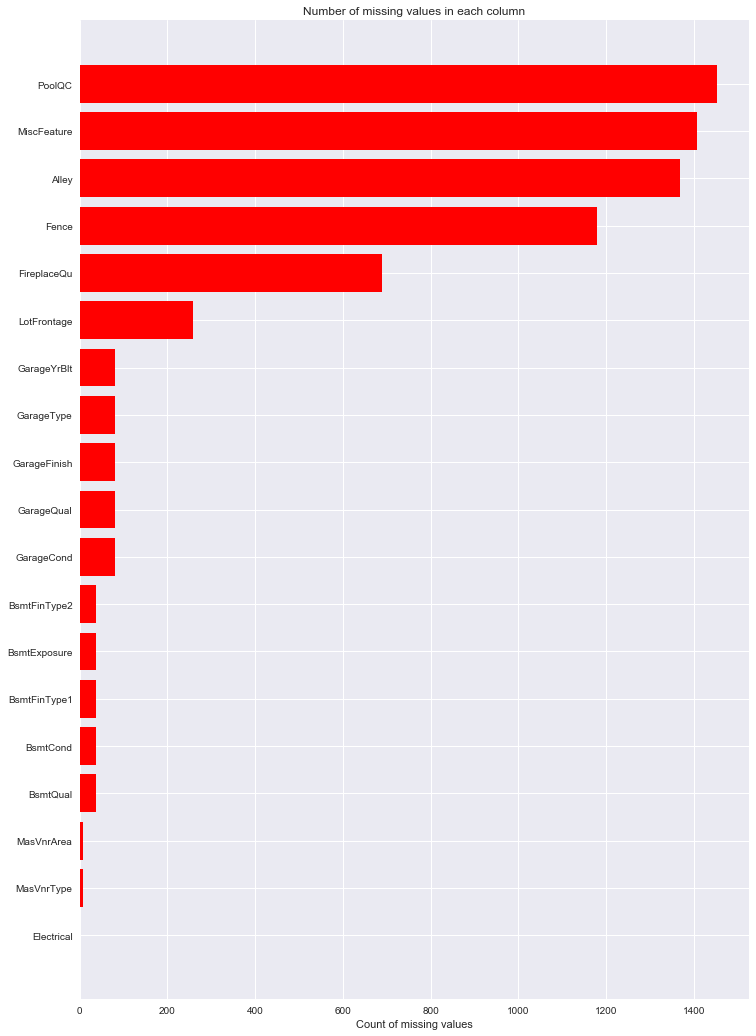

In [13]:
missing_plot(train_df)

In [70]:
missing = test_train_mis(combine[0],combine[1])

Empty DataFrame
Columns: [column_name, train_missing_count, train_missing_ratio, test_missing_count, test_missing_ratio, _merge, index, 0, Diff]
Index: []


In [15]:
drop = list(missing.column_name[:5]); print(drop)
for i in list(range(len(combine))):
    combine[i] =combine[i].drop(drop, axis = 1)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


## Imputation

In [16]:
#?pd.DataFrame.fillna()
# If I wanted to input column mean
# Would have to compute the mean with a function that igores NaNs

In [66]:
for i in list(range(len(combine))):
    combine[i].loc[:, combine[i].dtypes == float] = combine[i].loc[:, combine[i].dtypes == float].fillna(combine[i].mean())
    combine[i].loc[:, combine[i].dtypes == object] = combine[i].loc[:, combine[i].dtypes == object].fillna(combine[i].mode().iloc[0])
    combine[i].loc[:, combine[i].dtypes == int] =combine[i].loc[:, combine[i].dtypes == int].fillna(combine[i].median())

In [98]:
for dataset in combine:
    #print(dataset.isnull().values.ravel().sum())
    print(np.count_nonzero(dataset.isnull().values.ravel()))

0
0


In [72]:
combine[0].select_dtypes(include=['object']).columns
# pd.DataFrame.select_dtypes

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
for i in list(range(len(combine))):
    combine[i] = pd.get_dummies(combine[i],
        columns=combine[i].select_dtypes(include=['object']).columns)

In [74]:
print(combine[0].shape)
combine[0].head()

(1460, 271)


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id                                                                             
1           2003       196.0         706           0        150          856   
2           1976         0.0         978           0        284         1262   
3           2002       162.0         486           0        434          920   
4           1970         0.0         216           0        540          756   
5           2000       350.0         655           0        490         1145   

    1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
Id                                                                            
1        856       854             0       1710             1             0   
2       1262         0             0       1262             0             1   
3        920       866             0       1786             1             0   
4        961       756             0       1717             1             0   
5       1145      1053             0       2198             1             0   

    FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
Id                                                                             
1          2         1             3             1             8           0   
2          2         0             3             1             6           1   
3          2         1             3             1             6           1   
4          1         0             3             1             7           1   
5          2         1             4             1             9           1   

    GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
Id                                                                 
1        2003.0           2         548           0           61   
2        1976.0           2         460         298            0   
3        2001.0           2         608           0           42   
4        1998.0           3         642           0           35   
5        2000.0           3         836         192           84   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
Id                                                                             
1               0          0            0         0        0       2    2008   
2               0          0            0         0        0       5    2007   
3               0          0            0         0        0       9    2008   
4             272          0            0         0        0       2    2006   
5               0          0            0         0        0      12    2008   

    SalePrice  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
Id                                                                       
1      208500                 0            0            0            1   
2      181500                 0            0            0            1   
3      223500                 0            0            0            1   
4      140000                 0            0            0            1   
5      250000                 0            0            0            1   

    MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
Id                                                                      
1             0            0            1             0             0   
2           

In [75]:
pd.options.display.max_rows = 65
dtype_df = combine[0].dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       uint8    234
1       int64     34
2     float64      3

In [77]:
combine[0].shape, combine[1].shape

((1460, 271), (1459, 254))

In [84]:
diffcols = combine[0].columns.difference(combine[1].columns) ; diffcols

Index(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Electrical_Mix', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageQual_Ex', 'Heating_Floor', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'],
      dtype='object')

In [85]:
SalePrice = combine[0].SalePrice.copy()

In [86]:
combine[0] = combine[0].drop(diffcols, axis=1)

In [99]:
combine[0].columns.equals(combine[1].columns)

False

In [96]:
combine[0].shape, combine[1].shape

((1460, 255), (1459, 254))

In [95]:
combine[0]['SalePrice'] = SalePrice

In [97]:
combine[0].to_csv((os.path.join(path,r"house_train.csv")),header=True,index=True)
combine[1].to_csv((os.path.join(path,r"house_test.csv")),header=True,index=True)